<a href="https://colab.research.google.com/github/dudaspm/ProjectiOn/blob/master/Wright-Fisher%20Model/Wright_Fisher_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


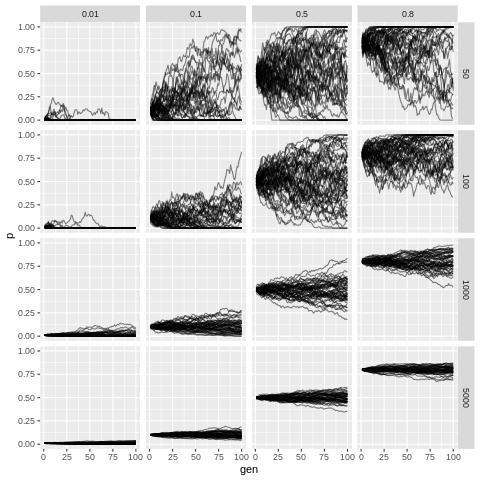

In [7]:
%%R
library(dplyr)
library(ggplot2)
# data.frame to be filled
wf_df <- data.frame()

# effective population sizes
sizes <- c(50, 100, 1000, 5000)

# starting allele frequencies
starting_p <- c(.01, .1, .5, .8)

# number of generations
n_gen <- 100

# number of replicates per simulation
n_reps <- 50

# run the simulations
for(N in sizes){
  for(p in starting_p){
    p0 <- p
    for(j in 1:n_gen){
      X <- rbinom(n_reps, 2*N, p)
      p <- X / (2*N)
      rows <- data.frame(replicate = 1:n_reps, N = rep(N, n_reps), 
                         gen = rep(j, n_reps), p0 = rep(p0, n_reps), 
                         p = p)
      wf_df <- bind_rows(wf_df, rows)
    }
  }
}

# plot it up!
p <- ggplot(wf_df, aes(x = gen, y = p, group = replicate)) +
     geom_path(alpha = .5) + facet_grid(N ~ p0) + guides(colour=FALSE)
p